<a href="https://colab.research.google.com/github/SriNavya413/Data-Analyst/blob/main/Project1--(6-12-2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1:- Read the dataset **
By using pandas .read_csv() function and storing it to the variable  , by
simple run the variable we see the data which is stored in that variabl

In [8]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/dataset (1).csv')

In [6]:
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


# **TASK 02 - CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT**



*   For checking the null values we use here **.isnull()**  function for counting we add **.sum()** function to it . To know how many nulls are present in each column { **.isnull().sum() **}
*   For checking the duplicated values we use here **.duplicated() **function for counting we add **.sum()** function to it . To know how many nulls are present in each column {  **.duplicated().sum()** }


In [7]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Missing values per column:
timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64
Number of duplicate rows: 0


# **TASK 03 - PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE**



*   we use matplotlib module for plotting the graph
*   we draw the graph based on season , Holiday , weekend , weathercode.
for tittle card we use tiltle() method and displaying graph show() method.




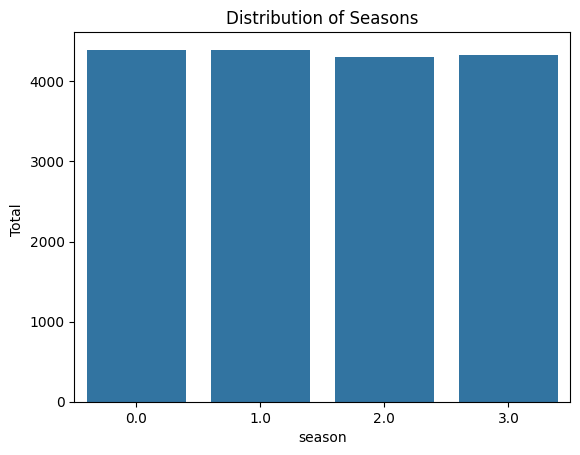

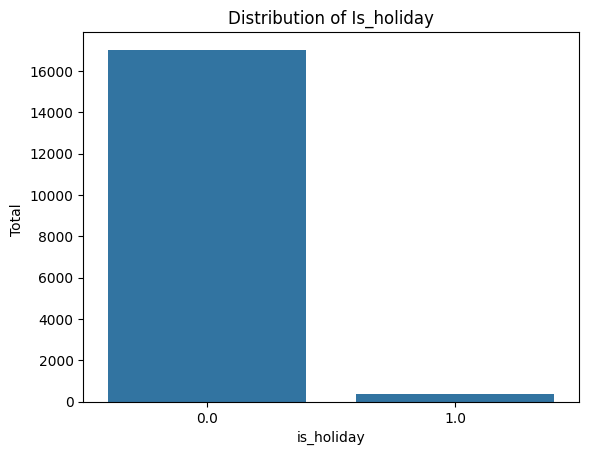

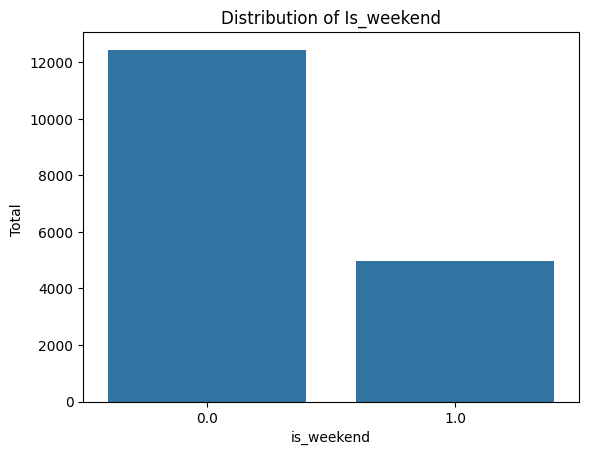

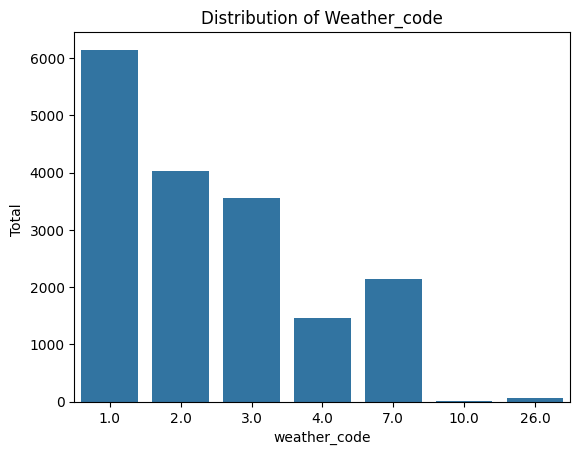

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plot distribution for 'season'
# Changed 'data' to 'data' to match the DataFrame variable name
sns.countplot(data=data, x='season')
plt.title('Distribution of Seasons')
plt.ylabel('Total ')
plt.show()

# Repeat for 'is_holiday', 'is_weekend', 'weather_code'
for col in ['is_holiday', 'is_weekend', 'weather_code']:  # Corrected column names here
    # Changed 'data' to 'data' here as well
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.ylabel('Total ')
    plt.show()

# **TASK 04 - LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX**

Here we done ,


*   First we check the datetype of 'timestamp' column for thid we use
            **.dtypes** keyword
*   Then we change it to Date formatte by uysing the  " **.to_datetime() **"
     function.
*   Finally we keep the time as the index to this dataset.





In [ ]:
# Check data types
print(data.dtypes)  # Change 'data' to 'data'

# Convert 'timestamp' column to datetime and set as index
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Change 'data' to 'date
data.set_index('timestamp', inplace=True)  # Change 'data' to 'data'

# Confirm changes
print(data.head())  # Change 'data' to 'data'
print(data.index)  # Change 'data' to 'data'


In [18]:
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


# **TASK 05 - MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC**.

**we extract the data from dataset by based upon the day of week , Month , Hour, Season , Year.**

In [19]:
# Extracting new time-based columns
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['day_of_month'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year
data['season'] = data['month'] % 12 // 3 + 1  # Example for deriving season

# Verify new columns
print(data.head())


                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  hour  day_of_week  \
timestamp                                                                
2015-01-04 00:00:00         0.0         1.0       1     0            6   
2015-01-04 01:00:00         0.0         1.0       1     1            6   
2015-01-04 02:00:00         0.0         1.0       1     2            6   
2015-01-04 03:00:00         0.0         1.0       1     3            6   
2015-01-04 04:00:00         0.0         1.0       1     4 

# **TASK 06 - VISUALIZING THE CORRELATION WITH A HEATMAP**



*   In this step first we find the correlation between two variables one to many by using **" .corr() " **function
*   Next we display values through heatmap .

          1.   figsize=(height,width) -> used to display the size of heatmap
          2.   cmap =" " -> used to show the how should be look like viridis , coolwarm , blue
          3.   fmt -> used to show the make size of each boxes.








In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

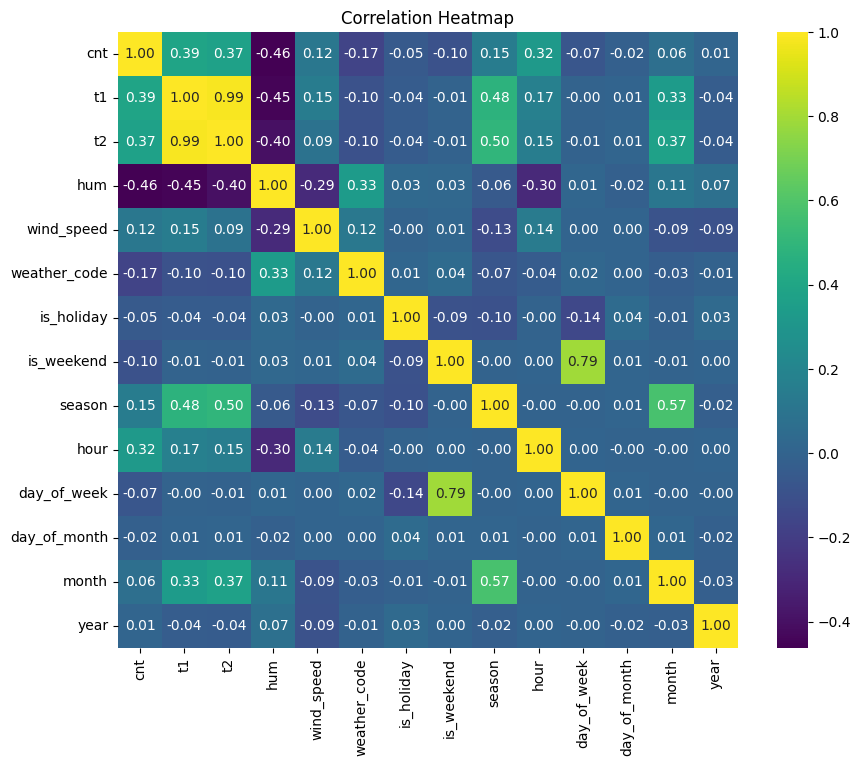

In [25]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# **TASK 07 - VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLOT**
Here we draw the barchat by using **" .barplot(x= value , y=value ) "**


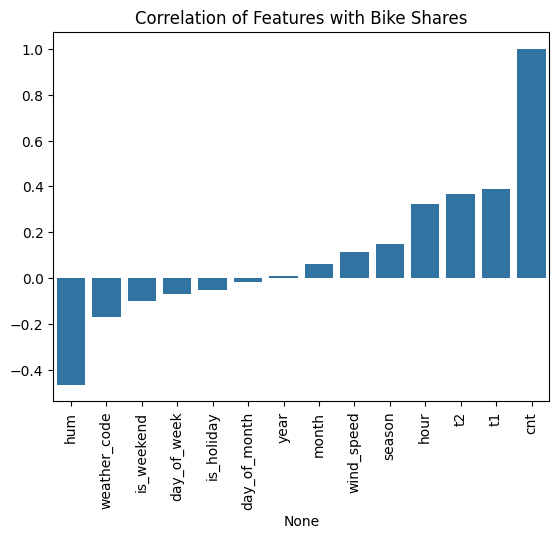

In [26]:
# Correlation with target
# Replace 'bike_shares' with the actual name of your target column
correlations = data.corr()['cnt'].sort_values()

# Plot barplot
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Bike Shares')
plt.show()

# **TASK 08 - PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT**

In this step we draw the lineplot chart by taking x-axis as Time and y-axis as Bike shares .
xlabel() is nothing but x-axis and ylable() is y-axis.

.figure() is used to make sizes of graph


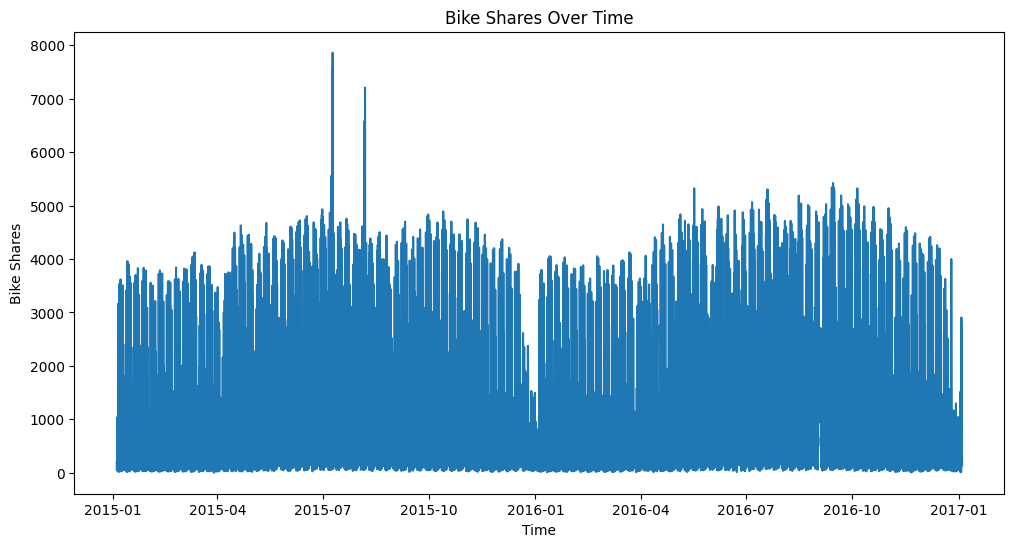

In [29]:
# Lineplot of bike shares over time
# Assuming 'cnt' is the correct column name for bike shares
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y='cnt')

plt.title('Bike Shares Over Time')
plt.xlabel('Time')
plt.ylabel('Bike Shares')
plt.show()


# **TASK 09 - PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)**

In this step we draw the lineplot and barplot graphs by taking
x-axis as month , y-axis as cnt {shares}

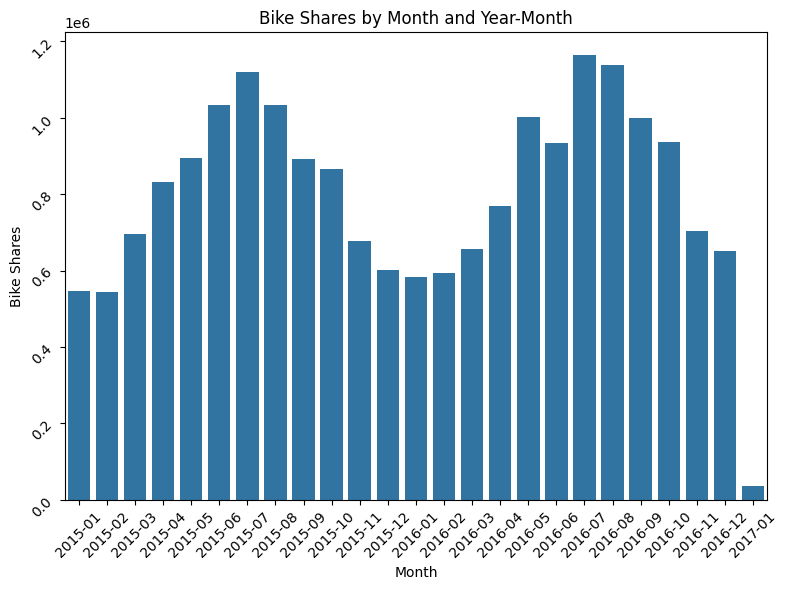

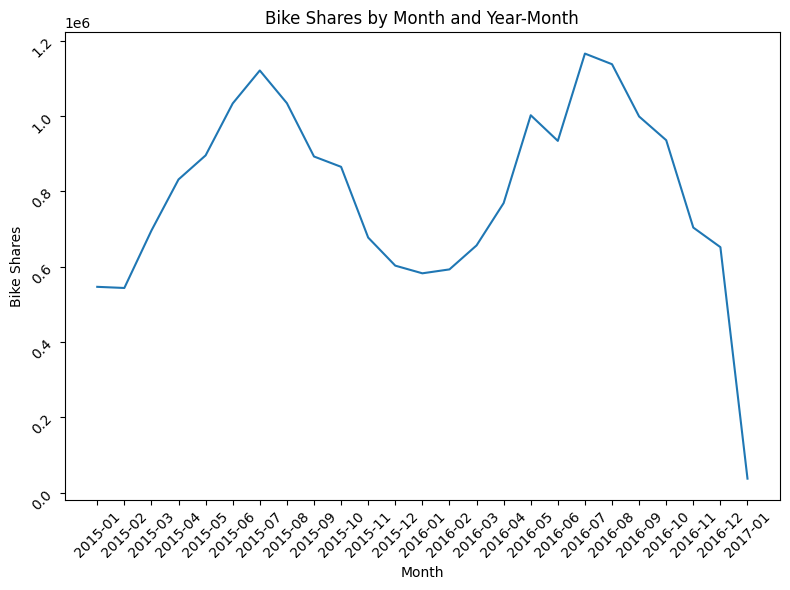

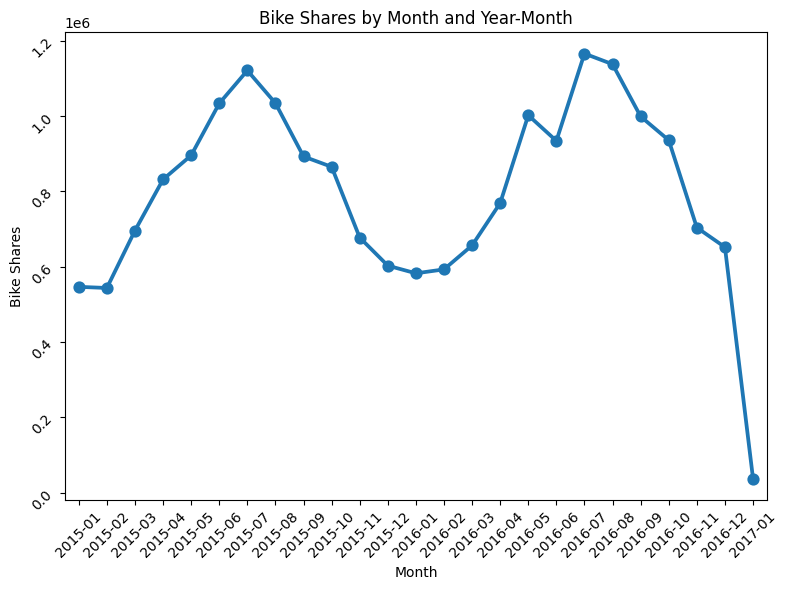

In [36]:
data['year_month'] = data.index.to_period('M') #Extracting 'year_month' column #Extracting 'year_month' column
bikeshares = data.groupby('year_month')['cnt'].sum() #Grouping the bike shares values

#Bar Plot Graph
plt.figure(figsize=(8,6))
plt.title('Bike Shares by Month and Year-Month')
sns.barplot(x=bikeshares.index.astype('string'), y=bikeshares)

plt.xlabel('Month')
plt.ylabel('Bike Shares')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

#Line Plot Graph
plt.figure(figsize=(8,6))
plt.title('Bike Shares by Month and Year-Month')
sns.lineplot(x=bikeshares.index.astype('string'), y=bikeshares)
plt.xlabel('Month')
plt.ylabel('Bike Shares')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

#Point Plot Graph
plt.figure(figsize=(8,6))
plt.title('Bike Shares by Month and Year-Month')
sns.pointplot(x=bikeshares.index.astype('string'), y=bikeshares)
plt.xlabel('Month')
plt.ylabel('Bike Shares')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# **TASK 10 - PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)**

We find the how many shares are going on market in holidays , weekend,season based upon the hours.

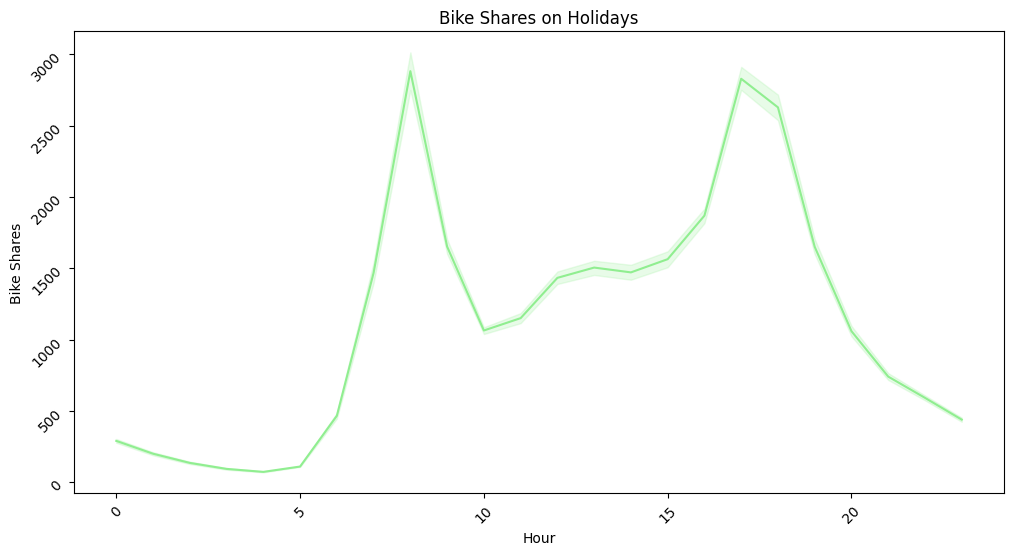

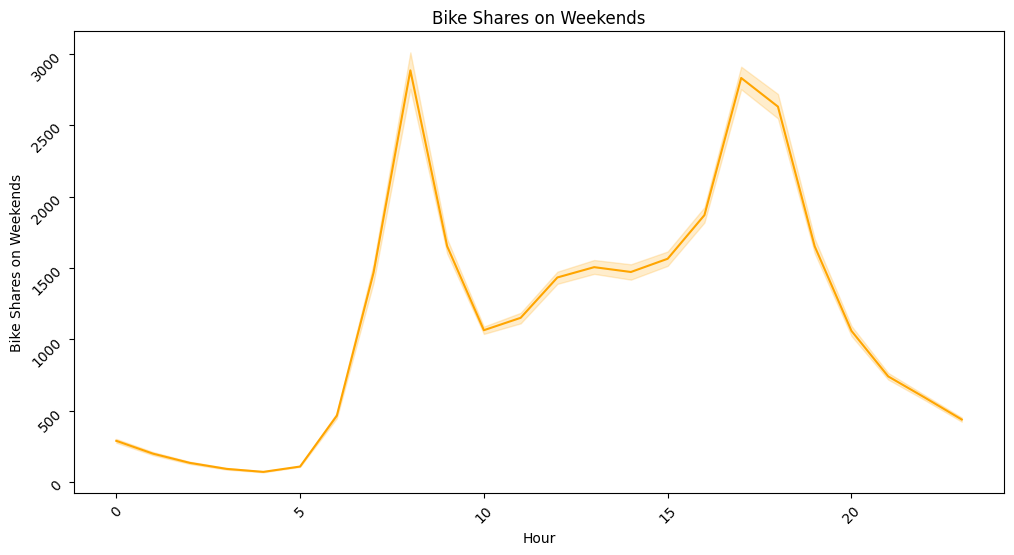

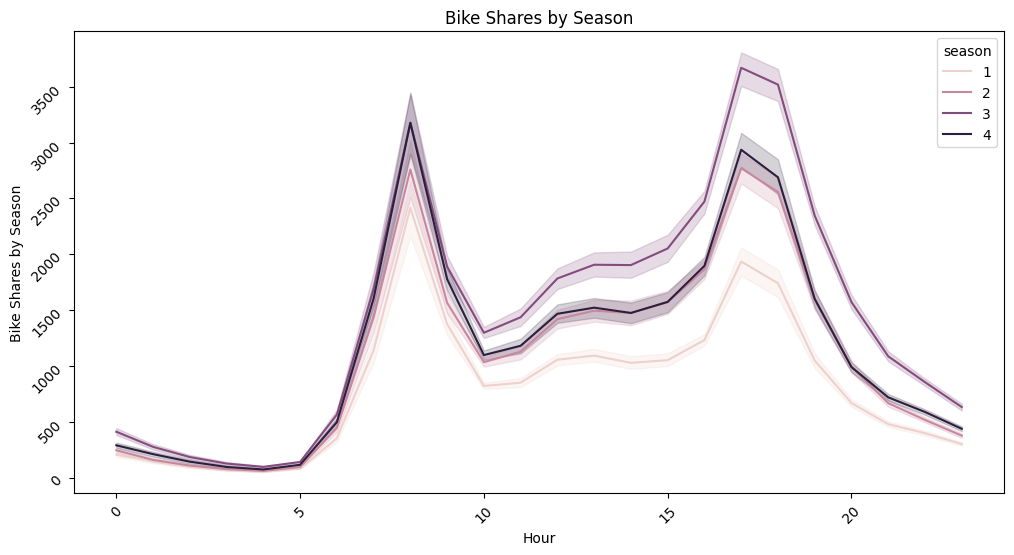

In [46]:
data['hour'] = data.index.hour #Extracting 'hour' column

#Line Plot Graph for Bike Shares on Holidays
data['hour'] = data.index.hour #Extracting 'hour' column

import matplotlib.pyplot as plt
import seaborn as sns

#Line Plot Graph for Bike Shares on Holidays
plt.figure(figsize=(12,6))
plt.title('Bike Shares on Holidays')
sns.lineplot(x=data['hour'], y=data['cnt'], data=data[data['is_holiday'] == 1], color='lightgreen')
plt.xlabel('Hour')
plt.ylabel('Bike Shares')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

#Line Plot Graph for Bike Shares on Weekends
plt.figure(figsize=(12,6))
plt.title('Bike Shares on Weekends')
sns.lineplot(x=data['hour'], y=data['cnt'], data=data[data['is_weekend'] == 1], color="orange")
plt.xlabel('Hour')
plt.ylabel('Bike Shares on Weekends')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

#Line Plot Graph for Bike Shares by Season
plt.figure(figsize=(12, 6))
plt.title('Bike Shares by Season')
sns.lineplot(x=data['hour'], y=data['cnt'],  hue=data['season'], data=data )
plt.xlabel('Hour')
plt.ylabel('Bike Shares by Season')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



# **TASK 11 - PLOTTING BIKE SHARES BY DAY OF WEEK**
We draw the barplot for day_of_week and cnt columns as x-axis and y-axis. by
       using  **" .barplot() "**

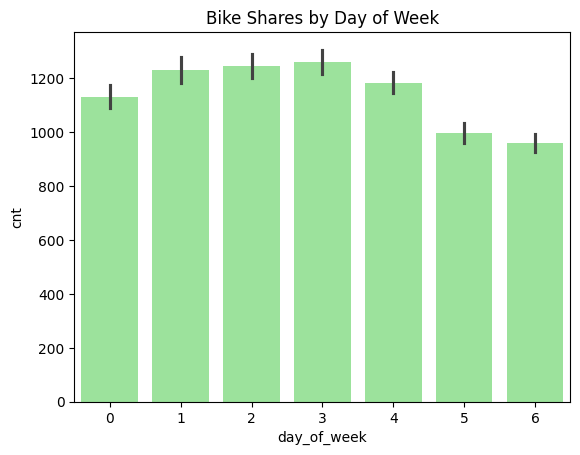

In [48]:
sns.barplot(data=data, x='day_of_week', y='cnt',color="lightgreen") # Changed 'bike_shares' to 'cnt'
plt.title('Bike Shares by Day of Week')
plt.show()

# **TASK 12 - PLOTTING BIKE SHARES BY DAY OF MONTH**

Here we plot a graph by using day_of_month and cnt .
This graph shows the what days of the bike shares are high in a month.


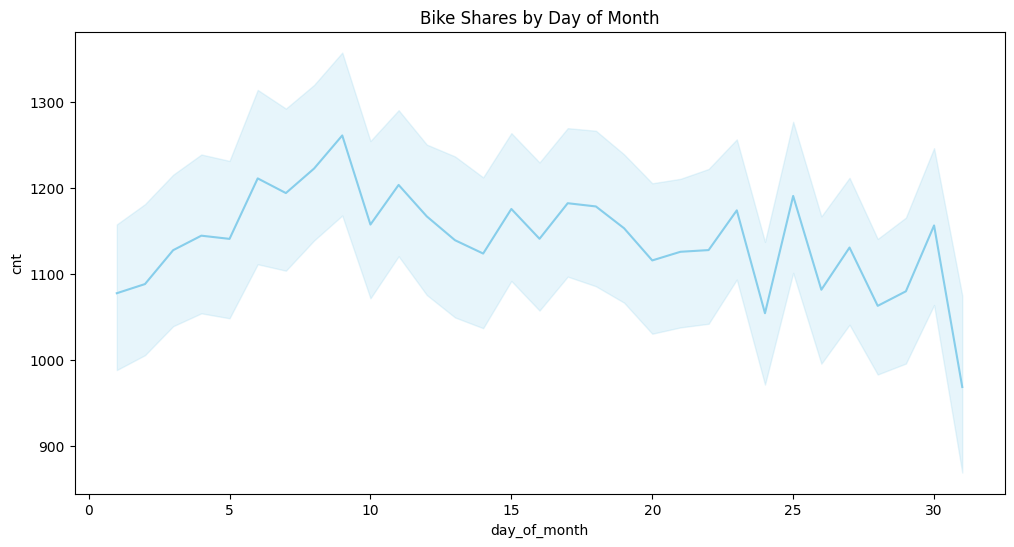

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='day_of_month', y='cnt', color="skyblue")  # Changed 'bike_shares' to 'cnt'
plt.title('Bike Shares by Day of Month')
plt.show()

# **TASK 13 - PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON**
Here we draw the bar chat
  1. By taking year and cnt
  2. By taking holidays in a season and cnt

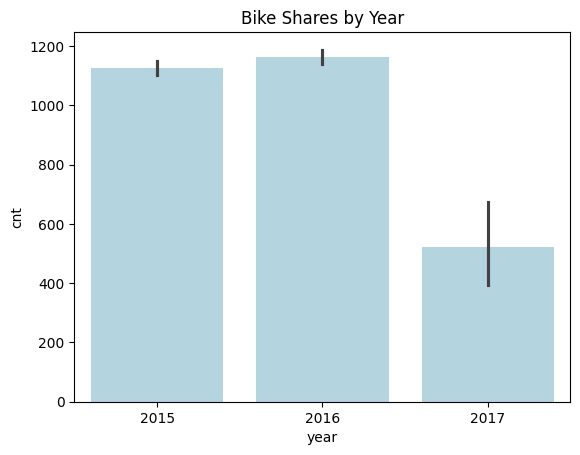

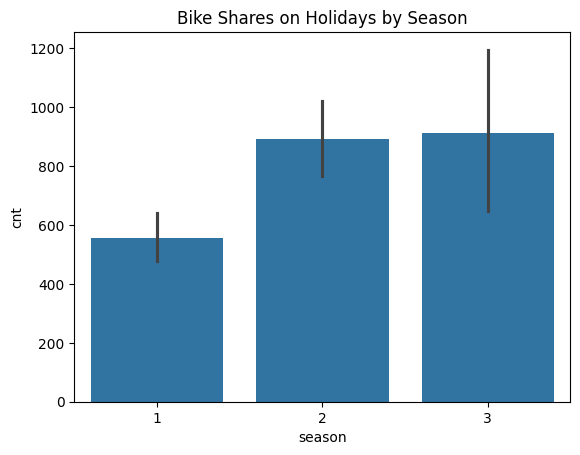

In [56]:
# Plot by year
sns.barplot(data=data, x='year', y='cnt', color="lightblue")  # Changed 'bike_shares' to 'cnt'
plt.title('Bike Shares by Year')
plt.show()

# Plot holidays by season
sns.barplot(data=data[data['is_holiday'] == 1], x='season', y='cnt')  # Changed 'bike_shares' to 'cnt' and 'holiday' to 'is_holiday'
plt.title('Bike Shares on Holidays by Season')
plt.show()


# **TASK 14 - VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT**

We draw the piechart and bar chart by taking the no.of shares as priority for both weekdays and weekends.


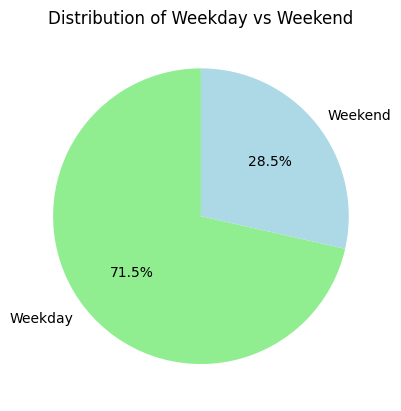

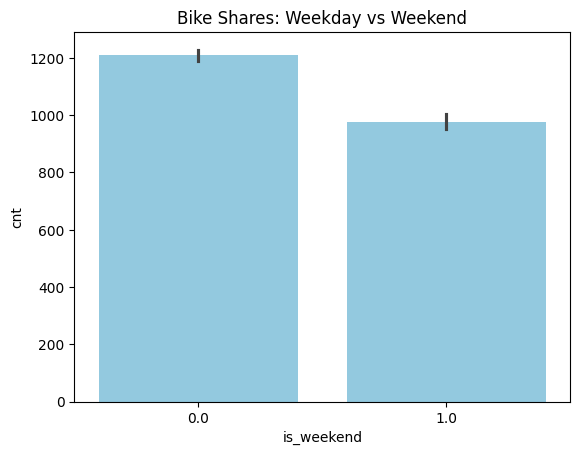

In [65]:
# Pie chart
# Assuming 'is_weekend' column represents weekend status (0 or 1)
weekend_counts = data['is_weekend'].value_counts()  # Changed 'weekend' to 'is_weekend'
plt.pie(weekend_counts, labels=['Weekday', 'Weekend'], autopct='%1.1f%%', startangle=90 , colors=['lightgreen' , 'lightblue'])
plt.title('Distribution of Weekday vs Weekend')
plt.show()

# Barplot
# Using 'is_weekend' and assuming 'cnt' represents bike shares
sns.barplot(data=data, x='is_weekend', y='cnt',color="skyblue")  # Changed 'weekend' to 'is_weekend' and 'bike_shares' to 'cnt'
plt.title('Bike Shares: Weekday vs Weekend')
plt.show()

# **TASK 15 - PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON**
Here we draw the graph for weather_code and season based on distribution

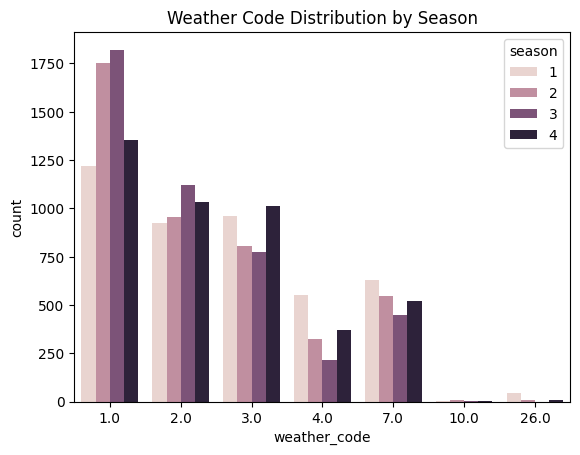

In [67]:
sns.countplot(data=data, x='weather_code', hue='season')
plt.title('Weather Code Distribution by Season')
plt.show()
